2.6.0
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


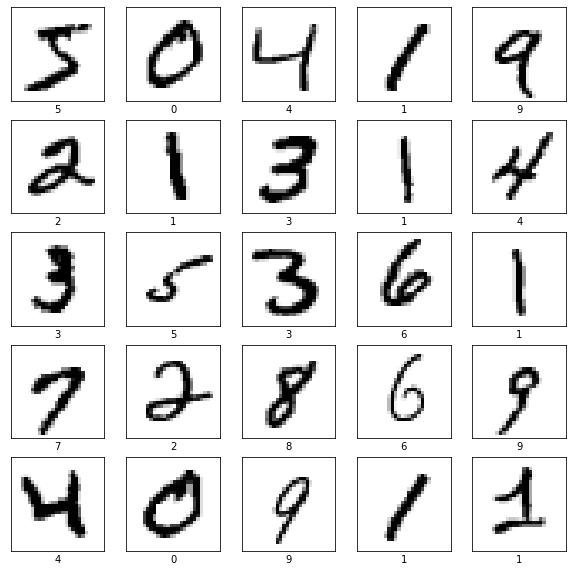

In [18]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Load digits minist
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")

print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()


In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.2669 - accuracy: 0.9243
Epoch 2/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.1167 - accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 2s 866us/step - loss: 0.0803 - accuracy: 0.9760
Epoch 4/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.0602 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 2s 829us/step - loss: 0.0466 - accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.0368 - accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.0308 - accuracy: 0.9904
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0228 - accuracy: 0.9933
Epoch 9/10
1875/1875 [==============================] - 2s 953us/step - loss: 0.0195 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 2s 829us/


Predictions: 7

Predictions: 2

Predictions: 1

Predictions: 0

Predictions: 4

Predictions: 1

Predictions: 4

Predictions: 9

Predictions: 5

Predictions: 9

Predictions: 0

Predictions: 6

Predictions: 9

Predictions: 0

Predictions: 1

Predictions: 5

Predictions: 9

Predictions: 7

Predictions: 3

Predictions: 4

Predictions: 9

Predictions: 6

Predictions: 6

Predictions: 5

Predictions: 4


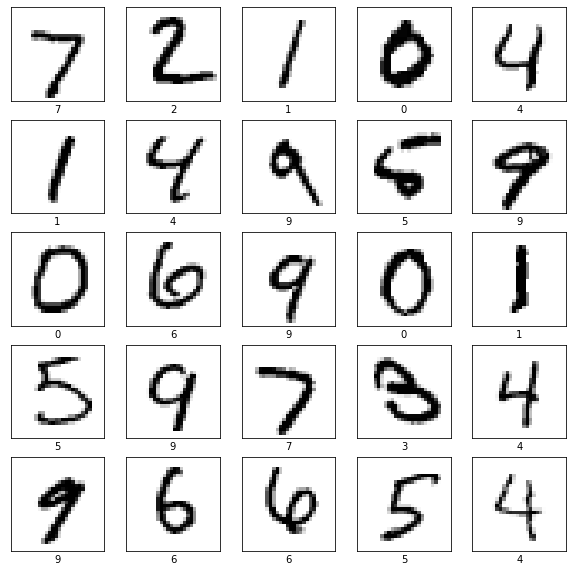

In [20]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(test_labels[i])
    print('\nPredictions:', np.argmax(predictions[i]))
plt.show()